# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple and apply a head()

In [59]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [60]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type and check the info()

In [61]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [62]:
apple.set_index(["Date"],inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [63]:
apple.index.duplicated().any()


np.False_

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [64]:
apple.sort_index(ascending=True,inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [65]:
ultimoBDM = apple.asfreq("BME")
ultimoBDM

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [66]:
(apple.index[-1] - apple.index[0]).days

12261

### Step 11.  How many months in the data we have?

In [67]:
pd.date_range("1980-12-12", "2014-07-08", freq='ME')

DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='ME')

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

Text(0, 0.5, 'Adj Close')

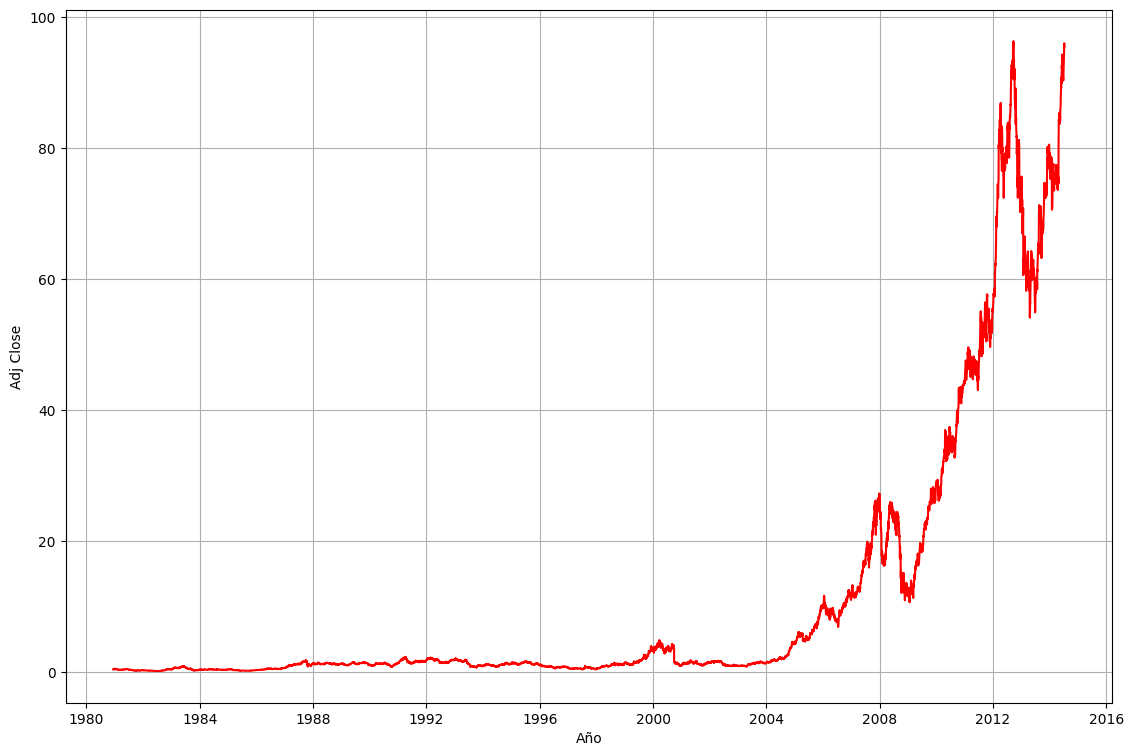

In [74]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple.index, apple["Adj Close"], color="red")
plt.grid()
plt.xlabel("Año")
plt.ylabel("Adj Close")